In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from datasets import load_dataset
import random
import librosa
import librosa.display
import numpy as np
from tqdm.auto import tqdm
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import models, transforms

# Load the dataset from Hugging Face
dataset = load_dataset("SherryT997/IndicTTS-Deepfake-Challenge-Data")

random.seed(42)
torch.manual_seed(91)

# Get a random subset of 10,000 samples
train_data = dataset["train"].select(random.sample(range(len(dataset["train"])), 10000))
test_data = dataset["test"] 

README.md:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/35 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/35 [00:00<?, ?it/s]

train-00000-of-00035.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00001-of-00035.parquet:   0%|          | 0.00/461M [00:00<?, ?B/s]

train-00002-of-00035.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00003-of-00035.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

train-00004-of-00035.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00005-of-00035.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00006-of-00035.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

train-00007-of-00035.parquet:   0%|          | 0.00/516M [00:00<?, ?B/s]

train-00008-of-00035.parquet:   0%|          | 0.00/557M [00:00<?, ?B/s]

train-00009-of-00035.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

train-00010-of-00035.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00011-of-00035.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

train-00012-of-00035.parquet:   0%|          | 0.00/414M [00:00<?, ?B/s]

train-00013-of-00035.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

train-00014-of-00035.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

train-00015-of-00035.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

train-00016-of-00035.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00017-of-00035.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

train-00018-of-00035.parquet:   0%|          | 0.00/471M [00:00<?, ?B/s]

train-00019-of-00035.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

train-00020-of-00035.parquet:   0%|          | 0.00/559M [00:00<?, ?B/s]

train-00021-of-00035.parquet:   0%|          | 0.00/541M [00:00<?, ?B/s]

train-00022-of-00035.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00023-of-00035.parquet:   0%|          | 0.00/599M [00:00<?, ?B/s]

train-00024-of-00035.parquet:   0%|          | 0.00/576M [00:00<?, ?B/s]

train-00025-of-00035.parquet:   0%|          | 0.00/547M [00:00<?, ?B/s]

train-00026-of-00035.parquet:   0%|          | 0.00/537M [00:00<?, ?B/s]

train-00027-of-00035.parquet:   0%|          | 0.00/421M [00:00<?, ?B/s]

train-00028-of-00035.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

train-00029-of-00035.parquet:   0%|          | 0.00/287M [00:00<?, ?B/s]

train-00030-of-00035.parquet:   0%|          | 0.00/282M [00:00<?, ?B/s]

train-00031-of-00035.parquet:   0%|          | 0.00/688M [00:00<?, ?B/s]

train-00032-of-00035.parquet:   0%|          | 0.00/613M [00:00<?, ?B/s]

train-00033-of-00035.parquet:   0%|          | 0.00/309M [00:00<?, ?B/s]

train-00034-of-00035.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

test-00000-of-00004.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

test-00001-of-00004.parquet:   0%|          | 0.00/364M [00:00<?, ?B/s]

test-00002-of-00004.parquet:   0%|          | 0.00/410M [00:00<?, ?B/s]

test-00003-of-00004.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31102 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2635 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/35 [00:00<?, ?it/s]

In [3]:
def extract_mel_spectrogram(audio_array, sr=16000, n_fft=512, n_mels=128):
    """Extract Mel Spectrogram and handle short signals"""
    if len(audio_array) < n_fft:
        pad_width = n_fft - len(audio_array)
        audio_array = np.pad(audio_array, (0, pad_width))  # Pad with zeros
    
    mel_spec = librosa.feature.melspectrogram(y=audio_array, sr=sr, n_fft=n_fft, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db

# Process dataset
train_mel_specs = []
train_labels = []

for sample in tqdm(train_data, desc="Extracting Mel Spectrograms"):
    mel_spec = extract_mel_spectrogram(sample["audio"]["array"])
    
    # Ensure consistent shape by padding or truncating
    target_shape = (128, 128)
    mel_spec_resized = librosa.util.fix_length(mel_spec, size=target_shape[1], axis=1)
    
    train_mel_specs.append(mel_spec_resized)
    train_labels.append(sample["is_tts"])

# Convert to NumPy arrays
X_train = np.array(train_mel_specs)
y_train = np.array(train_labels)

print("Final Shape:", X_train.shape)  # Should be (num_samples, 128, 128)

# Process dataset
test_mel_specs = []
test_labels = []
test_ids = []

for sample in tqdm(test_data, desc="Extracting Mel Spectrograms"):
    mel_spec = extract_mel_spectrogram(sample["audio"]["array"])
    
    # Ensure consistent shape by padding or truncating
    target_shape = (128, 128)
    mel_spec_resized = librosa.util.fix_length(mel_spec, size=target_shape[1], axis=1)
    
    test_mel_specs.append(mel_spec_resized)
    test_labels.append(sample["is_tts"])
    test_ids.append(sample["id"])

X_test = np.array(test_mel_specs)
y_test = np.array(test_labels)

print("Final Shape:", X_test.shape)  # Should be (num_samples, 128, 128)

Extracting Mel Spectrograms:   0%|          | 0/10000 [00:00<?, ?it/s]

Final Shape: (10000, 128, 128)


Extracting Mel Spectrograms:   0%|          | 0/2635 [00:00<?, ?it/s]

Final Shape: (2635, 128, 128)


In [4]:
def resize_mel_spectrogram(mel_spec, target_size=(224, 224)):  # Changed to 224x224 for ResNet
    return cv2.resize(mel_spec, target_size, interpolation=cv2.INTER_CUBIC)

# Apply resizing
X_train_resized = np.array([resize_mel_spectrogram(m) for m in X_train])
X_test_resized = np.array([resize_mel_spectrogram(m) for m in X_test])

# Normalize (convert values to [0,1])
X_train_normalized = X_train_resized / np.max(X_train_resized)
X_test_normalized = X_test_resized / np.max(X_test_resized)

# Convert to PyTorch tensors and add channel dimension (3 channels for ResNet)
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32).unsqueeze(1)
X_train_tensor = X_train_tensor.repeat(1, 3, 1, 1)  # Repeat grayscale to 3 channels
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32).unsqueeze(1)
X_test_tensor = X_test_tensor.repeat(1, 3, 1, 1)  # Repeat grayscale to 3 channels
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print(X_train_tensor.shape)  # Expected: (num_samples, 3, 224, 224)
print(X_test_tensor.shape)   # Expected: (num_samples, 3, 224, 224)

torch.Size([10000, 3, 224, 224])
torch.Size([2635, 3, 224, 224])


In [5]:
# Create DataLoaders
batch_size = 4
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [6]:
# Load pre-trained ResNet-18 model
class DeepfakeDetector(nn.Module):
    def __init__(self):
        super(DeepfakeDetector, self).__init__()
        # Load pre-trained ResNet-18
        self.resnet = models.resnet18(pretrained=True)
        
        # Replace the final fully connected layer
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.resnet(x)

In [7]:
# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeDetector().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 160MB/s]


In [8]:
# Add this before training to check class distribution
print("Train labels distribution:", np.unique(y_train, return_counts=True))
print("Test labels distribution:", np.unique(y_test, return_counts=True))

Train labels distribution: (array([0, 1]), array([5019, 4981]))
Test labels distribution: (array([-1]), array([2635]))


In [9]:
def safe_auc(y_true, y_pred):
    if len(np.unique(y_true)) < 2:
        print("Warning: Only one class present in labels, returning accuracy instead")
        # Convert predictions to binary (0/1)
        binary_preds = (np.array(y_pred) > 0.5).astype(int)
        return np.mean(binary_preds == y_true)
    else:
        return roc_auc_score(y_true, y_pred)



In [10]:
# Training loop
epochs = 10
best_train_auc = 0
best_model_state = None

from sklearn.metrics import roc_auc_score

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    
    print(f"\nEpoch {epoch+1}/{epochs}")
    with tqdm(total=len(train_loader), desc="Training Progress", unit="batch") as pbar:
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            all_preds.extend(outputs.detach().cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            pbar.update(1)
    
    epoch_loss = running_loss / len(train_dataset)
    epoch_auc = roc_auc_score(all_labels, all_preds)
    
    # Validation
    model.eval()
    val_preds = []
    val_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).squeeze()
            val_preds.extend(outputs.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
    
    val_auc = safe_auc(val_labels, val_preds)    
    
    print(f"Loss: {epoch_loss:.4f}, AUC: {epoch_auc:.4f}, Val AUC: {val_auc:.4f}")
    
    # Save best model
    if epoch_auc > best_train_auc:
        best_train_auc = epoch_auc
        best_model_state = model.state_dict().copy()
    
    # Early stopping
    if epoch > 5 and epoch_auc < best_train_auc:
        print("Validation AUC decreased. Stopping early.")
        break

print("Training Complete!")


Epoch 1/10


Training Progress:   0%|          | 0/2500 [00:00<?, ?batch/s]

Loss: 0.1964, AUC: 0.9765, Val AUC: 0.0000

Epoch 2/10


Training Progress:   0%|          | 0/2500 [00:00<?, ?batch/s]

Loss: 0.0366, AUC: 0.9985, Val AUC: 0.0000

Epoch 3/10


Training Progress:   0%|          | 0/2500 [00:00<?, ?batch/s]

Loss: 0.0251, AUC: 0.9992, Val AUC: 0.0000

Epoch 4/10


Training Progress:   0%|          | 0/2500 [00:00<?, ?batch/s]

Loss: 0.0197, AUC: 0.9995, Val AUC: 0.0000

Epoch 5/10


Training Progress:   0%|          | 0/2500 [00:00<?, ?batch/s]

Loss: 0.0193, AUC: 0.9995, Val AUC: 0.0000

Epoch 6/10


Training Progress:   0%|          | 0/2500 [00:00<?, ?batch/s]

Loss: 0.0116, AUC: 0.9997, Val AUC: 0.0000

Epoch 7/10


Training Progress:   0%|          | 0/2500 [00:00<?, ?batch/s]

Loss: 0.0148, AUC: 0.9997, Val AUC: 0.0000
Validation AUC decreased. Stopping early.
Training Complete!


Min prediction: 6.2847425e-07
Max prediction: 1.0
Mean prediction: 0.7243366


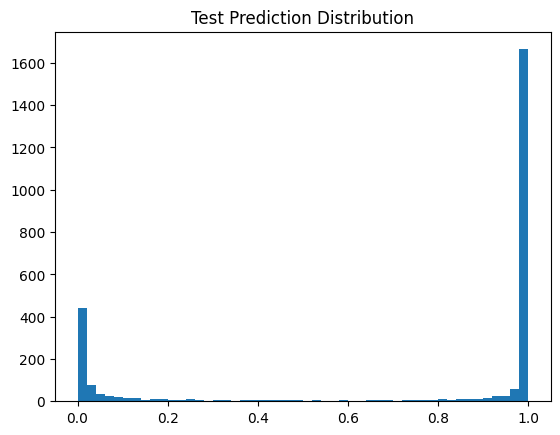

In [11]:
# Load best model for predictions
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    
# Generate predictions
model.eval()
test_preds = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        test_preds.extend(outputs.cpu().numpy())

print("Min prediction:", np.min(test_preds))
print("Max prediction:", np.max(test_preds))
print("Mean prediction:", np.mean(test_preds))

# Create submission file
submission = pd.DataFrame({"id": test_ids, "is_tts": test_preds})
submission.to_csv("submission.csv", index=False)

# Plot prediction distribution
plt.hist(submission['is_tts'], bins=50)
plt.title("Test Prediction Distribution")
plt.show()